In [2]:
#step 2.2
import numpy as np
import matplotlib.pyplot as plt

X = np.array([-4.5, -3.5, -3, -1.8, -0.2, 0.3, 1.3, 2.6, 3.8, 4.8]).reshape(-1,1)
y = np.array([
    [-0.91650116],
    [-0.47546053],
    [-0.10972425],
    [ 0.29504095],
    [-0.01596218],
    [ 0.10014949],
    [ 0.48104303],
    [ 0.10979023],
    [-0.99742128],
    [-0.91221826]
]).reshape(-1,1)

X_test = np.array([-3.99, -1.38, -1.37, -0.94,
                   0.69, 1.4, 1.57, 1.78, 1.81, 4.89]).reshape(-1,1)

y_test = np.array([
    [-0.80737607],
    [ 0.19813376],
    [ 0.19537639],
    [ 0.07185977],
    [ 0.24954213],
    [ 0.50662504],
    [ 0.52943298],
    [ 0.52406997],
    [ 0.51999057],
    [-0.82318288]
]).reshape(-1,1)

def poly_features(X, K):
    # X = X.flatten()
    # N = X.shape[0]
    # Phi = np.zeros((N, K+1))
    # for k in range(K+1):
    #     Phi[:, k] = X**k
    # return Phi
    return np.hstack([X**k for k in range(K+1)])

def normalize_features(Phi):
    mu = np.mean(Phi, axis=0)
    sigma = np.std(Phi, axis=0)
    sigma[sigma == 0] = 1.0
    Phi_normalized = (Phi - mu) / sigma
    Phi_normalized[:,0] =1
    return Phi_normalized, mu, sigma

# Optimal polynomial degree
optimal_k = 9

# 1. Generate polynomial features
Phi = poly_features(X, optimal_k)
Phi_test = poly_features(X_test, optimal_k)

# 2. Normalize features
Phi, mu, sigma = normalize_features(Phi)
Phi_test = (Phi_test - mu) / sigma
Phi_test[:,0] =1

np.random.seed(42)
theta = np.random.randn(Phi.shape[1], 1)
alpha = 0.0002
max_iter = 100000
decay_rate = 0.00001



Theta (Gradient Descent): [[-0.2441264 ]
 [ 0.15051802]
 [ 0.61527348]
 [ 0.16081494]
 [-2.68179834]
 [-1.20524846]
 [ 1.01621666]
 [ 0.30645123]
 [ 0.64093337]
 [ 0.57833249]]
Final Train RMSE: 0.09152412456174965
Final Test RMSE: 0.1390259798795755


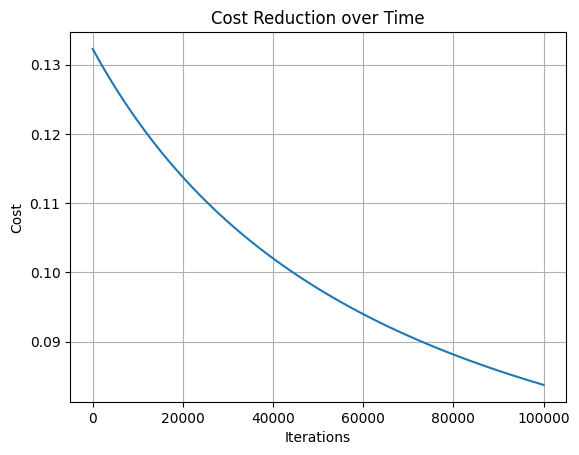

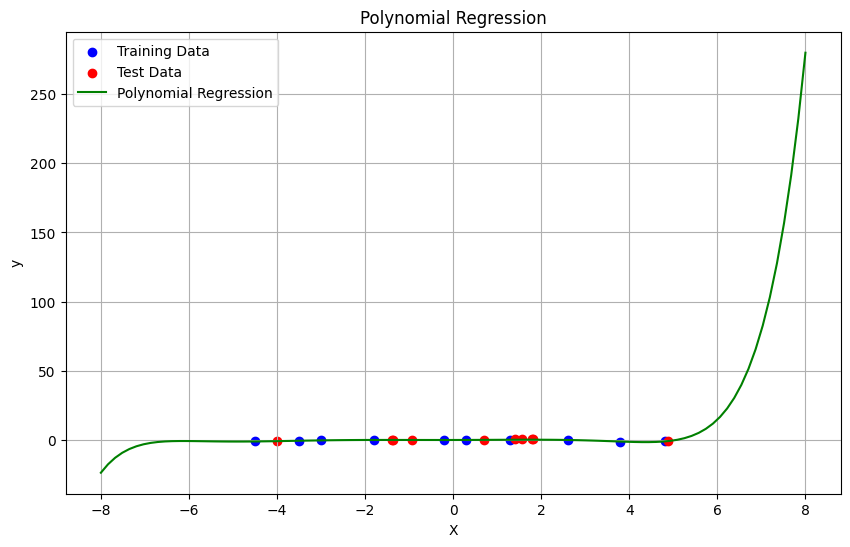

In [4]:
#step 2.3
def loss_function(Phi, y, theta):
    return np.sum((y - Phi.dot(theta)) ** 2)

def gradient_descent(X, y, theta, alpha, max_iter, decay_rate):
    n = len(y)
    cost_history = [0] * max_iter
    for i in range (max_iter):
      prediction = X.dot(theta)
      error =  y-prediction
      gradient = -2 * X.T.dot(error)
      alpha_t = alpha/ (1+ decay_rate*i)
      theta -=alpha_t *gradient
      cost_history[i] = loss_function(X,y,theta)

      if np.isnan(cost_history[i]) or (i > 0 and cost_history[i] > cost_history[i - 1]):
            print(f"Breaking at iteration {i} due to NaN or cost increase")
            break
    return theta, cost_history

theta_gd, cost_history = gradient_descent(Phi, y, theta, alpha, max_iter,decay_rate)
print("Theta (Gradient Descent):", theta_gd)

y_train_pred = Phi @ theta_gd
y_test_pred = Phi_test @ theta_gd

def calculate_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

final_train_rmse = calculate_rmse(y, y_train_pred)
final_test_rmse = calculate_rmse(y_test, y_test_pred)

print("Final Train RMSE:", final_train_rmse)
print("Final Test RMSE:", final_test_rmse)

x_range = np.linspace (-8,8,100).reshape(-1,1)
x_range_poly = poly_features(x_range, optimal_k)
x_range_poly = (x_range_poly - mu) / sigma
x_range_poly[:,0] =1
y_range_pred = x_range_poly @ theta_gd

# Plotting Cost History
plt.figure()
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Reduction over Time")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Training Data', color='blue')
plt.scatter(X_test, y_test, label='Test Data', color='red')
plt.plot(x_range, y_range_pred, label='Polynomial Regression', color='green')
plt.legend()
plt.grid(True)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.show()

In [ ]:

def poly_features(X, K):
    # X = X.flatten()
    # N = X.shape[0]
    # Phi = np.zeros((N, K+1))
    # for k in range(K+1):
    #     Phi[:, k] = X**k
    # return Phi
    return np.hstack([X**k for k in range(K+1)])

def normalize_features(Phi):
    mu = np.mean(Phi, axis=0)
    sigma = np.std(Phi, axis=0)
    sigma[sigma == 0] = 1.0
    Phi_normalized = (Phi - mu) / sigma
    Phi_normalized[:,0] =1
    return Phi_normalized, mu, sigma

# Optimal polynomial degree
optimal_k = 9

# 1. Generate polynomial features
Phi = poly_features(X, optimal_k)
Phi_test = poly_features(X_test, optimal_k)

# 2. Normalize features
Phi, mu, sigma = normalize_features(Phi)
Phi_test = (Phi_test - mu) / sigma
Phi_test[:,0] =1

np.random.seed(42)
theta = np.random.randn(Phi.shape[1], 1)
alpha = 0.01
max_iter= 80000000

def loss_function(Phi, y, theta):
    return np.sum((y - Phi.dot(theta)) ** 2)

def gradient_descent(X, y, theta, alpha, max_iter, decay_rate):
    n = len(y)
    cost_history = [0] * max_iter
    for i in range (max_iter):
      prediction = X.dot(theta)
      error =  y-prediction
      gradient = -2 * X.T.dot(error)
      alpha_t = alpha/ (1+ decay_rate*i)
      theta -=alpha_t *gradient
      cost_history[i] = loss_function(X,y,theta)

      if np.isnan(cost_history[i]) or (i > 0 and cost_history[i] > cost_history[i - 1]):
            print(f"Breaking at iteration {i} due to NaN or cost increase")
            break
    return theta, cost_history

theta_gd, cost_history = gradient_descent(Phi, y, theta, alpha, max_iter,decay_rate)
# print("Theta (Gradient Descent):", theta_gd)

y_train_pred = Phi @ theta_gd
y_test_pred = Phi_test @ theta_gd

def calculate_rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

final_train = calculate_rmse(y, y_train_pred)
final_test = calculate_rmse(y_test, y_test_pred)

print("Final Train RMSE:", final_train)
print("Final Test RMSE:", final_test)

Final Train RMSE: 0.012524651766948496
Final Test RMSE: 0.029182576983915423


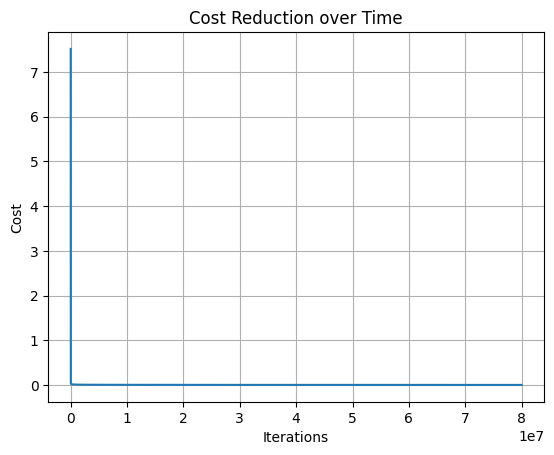

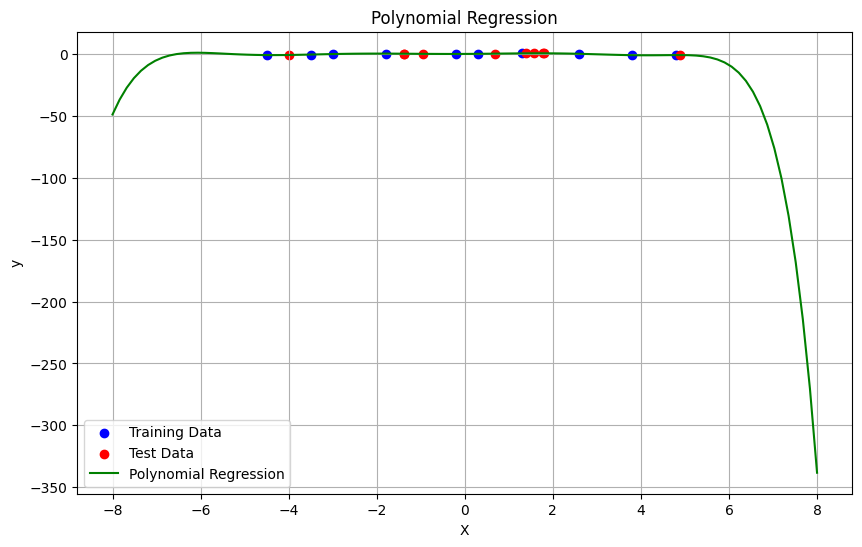

In [ ]:

x_range = np.linspace (-8,8,100).reshape(-1,1)
x_range_poly = poly_features(x_range, optimal_k)
x_range_poly = (x_range_poly - mu) / sigma
x_range_poly[:,0] =1
y_range_pred = x_range_poly @ theta_gd

# Plotting Cost History
plt.figure()
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Reduction over Time")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X, y, label='Training Data', color='blue')
plt.scatter(X_test, y_test, label='Test Data', color='red')
plt.plot(x_range, y_range_pred, label='Polynomial Regression', color='green')
plt.legend()
plt.grid(True)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Polynomial Regression')
plt.show()